# Math for ML: Calculus and Optimization

In Part 3 of this series on Math for ML, I'll focus on calculus and its most important application to machine learning, optimization, and in particular gradient descent.

Calculus is essentially the study of the continuum. Important things that calculus seeks to understand are:
- Infinitesimals: How to manipulate numbers that are "infinitely" small.
- Limits: What happens when numbers get arbitrarily close to each other.
- Differentiation: How one variable changes continuously in response to one or more other variables. 
- Integration: How to add up infinitely many numbers to get a finite number, e.g. to calculate areas and volumes of things.

Not all of these topics are equally important to know for machine learning in my opinion. I'll start by covering infinitesimals, which are foundational for describing anything in calculus. I'll then talk about differentiation in both the univariate and multivariate cases. Then, I'll discuss the important application of optimization and gradient descent. I'll finish with an optional section on integration in both the univariate and multivariate cases.

Let's get started.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *

## Infinitesimals

Fundamental to the understanding of calculus is the idea of an "infinitely small" number, called an infinitesimal. An **infinitesimal** is a number that's not 0 but so close to being 0 that you can't really tell it isn't 0. These small numbers are often written in math with letters like $\varepsilon$ or $\delta$. Think of them as *very very* tiny numbers, so tiny their square is basically 0:
$$\varepsilon > 0, \quad \varepsilon^2 \approx 0.$$

But what does this even mean? Here it might be helpful to recall our discussion of floating point numbers. Recall that we can't get infinite precision. In python's double precision floating point we can only get down to about $5 \cdot 10^{-324}$, or `5e-324`. If the square of a small number has a value *smaller* than about `5e-324` we'd literally get `0.0` as far as python is concerned.

Just for fun let's look at the really tiny number $10^{-200}$, or `1e-200`. That's 200 decimal places of zeros before the 1 even shows up. Python thinks `1e-200` is just fine. But what happens if we square it? We should in theory get $10^{-400}$, or 400 decimal places of zeros followed by a 1. But as far as floating point is concerned, the square is zero.

In [2]:
epsilon = 1e-200
epsilon, epsilon ** 2

(1e-200, 0.0)

Of course, you could argue that we could just go to a higher precision then. Use more bits. But eventually, if we keep making `epsilon` small enough we'll hit a point where `epsilon ** 2 = 0.0`. Thus, if it makes you feel better, when you see an infinitesimal just think "`1e-200` in double precision".

**Aside:** In practice, when using infinitesimals on a computer we're more likely to use an `epsilon` like `1e-3` or `1e-5`. Yes, in those cases their square is definitely non-zero in python, but they turn out to be much more numerical friendly to work with. Working with really small numbers like `1e-200` will make calculations likely to underflow or overflow, or cause a loss of precision when subtracting two nearby numbers like `(1 + 1e-200) - 1`.

Infinitesimals are especially interesting when added to regular numbers. For example, consider some finite number $x$. It could be 2 or -100 or whatever you want. Suppose now we add to it an infinitesimal number $\varepsilon$. What's the square of this new nearby number $x+\varepsilon$? Expanding, we'd have
$$(x + \varepsilon)^2 = x^2 + 2x\varepsilon + \varepsilon^2.$$
But since $\varepsilon^2 \approx 0$,
$$(x + \varepsilon)^2 \approx x^2 + 2x\varepsilon.$$

Okay, but what does this mean? Well, I can reformulate the question as follows: "If I change $x$ by a little bit, how much does the function $y=x^2$ change"? If $x$ is nudged to a value close by of $x+\varepsilon$, then $y$ necessarily gets nudged to a new value $(x+\varepsilon)^2$. 

So how much does $y$ change? Call this change $\delta(x)$. Then we'd just have
$$\delta(x) = (x+\varepsilon)^2 - x^2 \approx 2x\varepsilon.$$
That is, if we change $x$ by a small amount $\varepsilon$, then $y$ itself changes by a small amount $\delta(x)=2x\varepsilon$. Interestingly, how much $y$ changes actually depends on which $x$ we pick. If $x=1$ then $y$ changes by $2\varepsilon$, just twice how much $x$ is nudged. If $x=1000$ though, then $y$ changes by $2000\varepsilon$, a much bigger change.

### Limits [Optional]
Pick some value $x=x_0$, say $x=2$. Observe that by setting $\varepsilon=0$ directly in the above calculation gives the result $y_0=f(x_0)=x_0^2$. That is, it essentially just evaluates the function $f(x)$ at $x_0^2$. This idea of "evaluating" a function $f(x)$ at a point $x_0$ by looking at $f(x_0+\varepsilon)$ and then setting $\varepsilon=0$ is called taking the **limit**. You can imagine this as making $\varepsilon$ smaller and smaller and smaller until you get the exact value of $f(x_0)=x_0^2$ at $x_0$. For technical reasons, when people do this they write
$$\lim_{x \rightarrow x_0} f(x) = f(x_0),$$
and say "the limit of $f(x)$ as $x$ approaches $x_0$ is $f(x_0)$". In my experience, limits don't really tend to show up in machine learning, so you really don't need to know this. Just for your own edification.

## Differentiation

### Definition

When talking about things like "if we change $x$ a little bit, how much does $y$ change", we typically use a special notation to make it clear what is a small change of what. Instead of writing $\varepsilon$ we just write $dx$ to indicate "a little bit of $x$". Instead of writing $\delta(x)$ for "a little bit of $y$" we'd write $dy$. Note that both $dx$ and $dy$ are always infinitesimals, but their *ratio* is not as we'll see in a second. 

When using this $d$ notation, the values $dx$ and $dy$ are usually called **differentials**, which is where the term "differentiation" comes from. They're still infinitesimals, they just have another special name.

In this notation, we'd say $\text{"if } x \text{ changes to } x+dx \text{, then } y=f(x) \text{ changes to } y+dy=f(x+dx)\text{".}$ The small change we're solving for is then just $dy$,
$$dy = f(x+dx) - f(x) = (x + dx)^2 - x^2 = 2xdx + dx^2 \approx 2xdx.$$
So $dy \approx 2xdx$, or re-writing just because I can,
$$\frac{dy}{dx} = 2x.$$

This ratio of differentials $\frac{dy}{dx}$ is called the **derivative** of the function $y=x^2$, usually just pronounced "dydx". The act of taking a derivative is called **differentiation**. Notice there's no infinitesimal ($dy$ or $dx$) on the right-hand side, hence the derivative is not a small number. In fact it's on the scale of $x$ in this case since the right-hand side is $2x$.

Let's try to calculate this derivative for a specific value of $x$, say $x=1$, by taking the smaller and smaller values of $dx$ and seeing what the results look like. To do this, I'll define a loop over some values of $dx$ and see what the predicted derivative is. The exact answer at $x=1$ should be 
$$\frac{dy}{dx}\bigg|_{x=1}=2 \cdot 1 = 2.$$ 
Read this expression as $\text{"the derivative of } y \text{ with respect to } x \text{ evaluated at } x=1 \text{ is } 2 \text{"}$. 

I'll also print out the error, which is the predicted value $2$ minus the calculated value. Smaller error is better, obviously.

In [3]:
f = lambda x: x ** 2 # the function we want to differentiate
x0 = 1 # the value of x to calculate the derivative at
dydx_exact = 2 * x0 # the exact value of the derivative (if you have it)
for dx in [1, 0.1, 0.01, 0.001, 1e-4, 1e-5, 1e-10, 1e-100, 1e-200]:
    dydx1 = (f(x0 + dx) - f(x0)) / dx
    error = dydx1 - dydx_exact
    print(f'dx = {dx:8.16f} \t dy/dx = {dydx1:4f} \t error = {error:4f}')

dx = 1.0000000000000000 	 dy/dx = 3.000000 	 error = 1.000000
dx = 0.1000000000000000 	 dy/dx = 2.100000 	 error = 0.100000
dx = 0.0100000000000000 	 dy/dx = 2.010000 	 error = 0.010000
dx = 0.0010000000000000 	 dy/dx = 2.001000 	 error = 0.001000
dx = 0.0001000000000000 	 dy/dx = 2.000100 	 error = 0.000100
dx = 0.0000100000000000 	 dy/dx = 2.000010 	 error = 0.000010
dx = 0.0000000001000000 	 dy/dx = 2.000000 	 error = 0.000000
dx = 0.0000000000000000 	 dy/dx = 0.000000 	 error = -2.000000
dx = 0.0000000000000000 	 dy/dx = 0.000000 	 error = -2.000000


Starting with `dx=1` is a bad choice with a huge error of `1.0`. We're way off. Shrinking to `dx=0.1` puts us in the ball park with a value `dydx = 2.1`. You can see that making `dx` successively smaller and smaller makes the error successively smaller, in this case by a factor of 10 each time. We see the error getting smaller all the way down to about `dx=1e-10` before creeping up again as we make `dx` even smaller than that. This is due to the numerical roundoff of floating point numbers. We're subtracting two numbers `f(x0 + dx) - f(x0)` that are very close to each other when `dx` is really small, which as you'll recall is one of the pitfalls to avoid when working with floating point numbers. Feel free to play with different functions and values to get a feel for what's going on.

This method we just used to calculate the derivative is essentially exactly how derivatives are usually calculated on a computer. We choose a small value of `dx` and just apply the formula above, with some minor tweaks to get better accuracy in fewer steps. 

The process of calculating the derivative this way, directly from its definition essentially, is called **numerical differentiation**. This is how derivatives are usually calculated in most fields. This contrasts with how we'll usually calculate them in machine learning, which uses a technique called **autodifferentiation**, another technique that we'll discuss when we get to deep learning.

We can talk about any reasonably well-behaved function $f(x)$ having a derivative. If $y=f(x)$ and we nudge $x$ to a close by value $x+dx$, then $y$ gets nudged by $y+dy=f(x+dx)$. The amount $y=f(x)$ changes *per amount* $dx$ is then the derivative
$$\frac{dy}{dx} = \frac{f(x+dx)-f(x)}{dx}.$$
Note this definition is only exact when $dx$ is infinitesimal. For finite values of $dx$ like what we'd code up on a computer this equality is only approximately true.

**Aside:** There are actually many different notations for the derivative. I find the ratio of differentials notation the most intuitive since it tells you exactly what it is. Other notations for the derivative of a function are $f'(x)$, $y'$, $\dot y$, $D f(x)$. I'll try to avoid these in this book for the most part.

Since derivatives are finite-valued functions we can even talk about things like derivatives of derivatives. These are called **second derivatives**. They're just gotten by taking the derivative of $\frac{dy}{dx}$. Second derivatives are often written with the notation $\frac{d^2 y}{dx^2}$ and mean each of the following
$$\frac{d^2 y}{dx^2} = \frac{d}{dx} \frac{dy}{dx} = \frac{d\big(\frac{dy}{dx}\big)}{dx} = \frac{f(x+2dx) - 2f(x+dx) + f(x)}{dx^2}.$$
Other notations for the second derivative include $f''(x)$, $y''$, $\ddot y$, and $D^2 f(x)$. Second differentials also exist but they're less commonly used.

As a quick example, the second derivative of our running function $y=x^2$ turns out to be the derivative of $2x$, which is just $2$. In this case, the second derivative is constant. Try it yourself.

### Derivatives As Slopes

The (first) derivative has an interesting and useful geometric interpretation as the **slope** of the curve $y=f(x)$ at the point $x$. To see this, imagine a right triangle with length $dx$ and height $dy$. The slope of its hypotenuse is just the rise over over the run, i.e. the ratio $\frac{dy}{dx}$.

Here's a plot of what such a triangle might look like. I'm using a helper function `plot_right_triangle` here that takes in the 3 points that make up the triangle along with some optional arguments for the labels. Feel free to play around with different choices of `dx` and `dy` to see how the slope changes. Note you may need to adjust the label offset too if you want to show those.

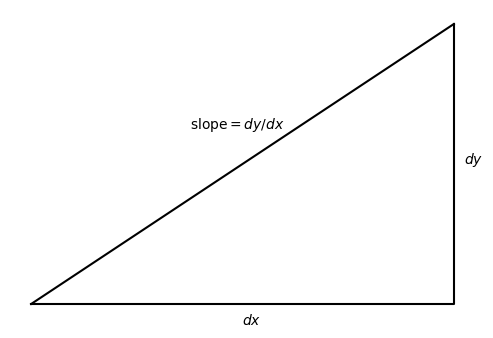

In [4]:
dx = dy = 1
points = [(0, 0), (dx, 0), (dy, 1)] # left, right, top coords
plot_right_triangle(points, base_label='$dx$', height_label='$dy$', hyp_label='slope$=dy/dx$', offset=0.05)

So the derivative is some kind of slope of a triangle with base $dx$ and height $dy$, but how does that relate to the function itself, $y=f(x)$? Since the derivative itself depends on $x$, the slope will too. But which slope are we talking about? It turns out the slope the derivative represents is the slope *tangent* to the function at a point $x=x_0$. That is, the derivative of $y=f(x)$ at $x=x_0$ is the slope of the *tangent line* defined by the affine function
$$y = y_0 + \frac{dy}{dx}\bigg|_{x=x_0}(x - x_0).$$

Here's an example. I'll plot the function $y=x^2$ and its *tangent* at a point $x_0=2$ on the x-axis. The corresponding $y$ at $x=2$ is just $y_0=x_0^2=4$. As we derived above, its derivative (and hence slope) at $x_0=2$ is
$$\frac{dy}{dx}\bigg|_{x=2}=2(2)=4,$$
so the equation for the tangent line of $y=x^2$ at $x_0=2$ is
$$y = 4 + 4(x - 2) = 4x -4.$$

In the code below, the tangent line calculation is done inside the function `get_tangent_line`, which takes as arguments a grid of $x$ values, their output $y$ values, the point of interest $x_0$, and an optional value for $dx$.
I'll plot the function itself along with its tangent line at $x_0=2$.

Feel free to adjust the value of `x0` observe how the slope changes with the value you pick. In all cases, the line should hug the curve of the function and stay tangent to it. If you're used to numpy already you can play around with the function itself as well by changing the line `y = x ** 2` to any other function you want.

In [5]:
def get_tangent_line(x, y, x0, dx=1e-5):
    x_nudged = x + dx
    y_nudged = x_nudged ** 2
    dy = y_nudged - y
    idx_x_eq_x0 = np.where(np.abs(x - x0) < dx)[0].item()
    y0, dydx0 = y[idx_x_eq_x0], (dy / dx)[idx_x_eq_x0].flatten()
    y_tangent = y0 + dydx0 * (x - x0)
    return y_tangent

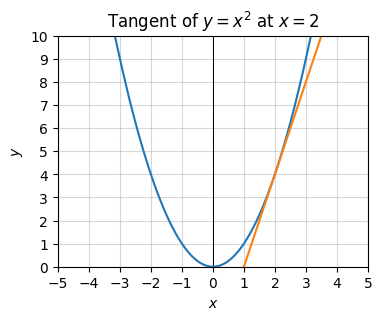

In [6]:
x0 = 2
x = np.arange(-10, 10, 0.1)
y = x ** 2
y_tangent = get_tangent_line(x, y, x0, dx=1e-5)
plot_function(x, (y, y_tangent), (-5, 5), (0, 10), title=f'Tangent of $y=x^2$ at $x={x0}$')

Generally speaking, if the derivative $\frac{dy}{dx}$ at a point is positive the slope will slant towards the right. If the derivative at that point is negative the slope will slant towards the left. And if it's zero at that point the slope there will be flat, i.e. horizontal. This last fact turns out to be very important as we'll see soon.

The second derivative $\frac{d^2 y}{dx^2}$ has a geometric interpretation as well but it's harder to visualize. The second derivative of a function captures information about the *curvature* of the function, i.e. how much a function bends at each point. If a given function is really step at a point its second derivative will be high. If it's really flat at a point its second derivative will be small.

### Differentiation Rules

Derivatives and differentials obey several laws that I'll mostly just state below. For most people it's not really that important to know all of these in machine learning, especially since we'll use autodifferentiation to calculate them for us. If you're more into research though it may behoove you to know these in more depth.

To save space I'll state all these rules in differential form. To get the derivative versions just divide both sides by $dx$.

Derivative Rules:
- Additive Rule: $d(u + v) = du + dv$ for any two functions $u=f(x)$ and $v=g(x)$,
- Constant Rule: $d(cy) = c dy$ for any constant $c$,
- Product Rule: $d(uv)=udv + vdu$ for any two functions $u=f(x)$ and $v=g(x)$,
- Quotient Rule: $v^2 d(\frac{u}{v}) = vdu-udv$ for any two functions $u=f(x)$ and $v=g(x)$,
- Chain Rule: $dz = \frac{dz}{dy}\frac{dy}{dx}dx$ for any compositional function $y=g(x)$ and $z=f(y)=f(g(x))$.

**Aside:** We can pretty easily derive these rules using infinitesimals. For example, here's a derivation of the all important work-horse of deep learning, the chain rule. Suppose we have a composite function given by $z=f(y)$ and $y=g(x)$, or equivalently $z=f(g(x))$. Let $dx,dy,dz$ be infinitesimals. Notice since $dz = f(y + dy) - f(y)$, and since by definition the derivative of $z=f(y)$ is
$$\frac{dz}{dy} = \frac{f(y+dy)-f(y)}{dy},$$
we have
$$dz = \frac{dz}{dy}dy.$$
By a similar argument, since $y=g(x)$ and $dy = g(x+dx) - g(x)$, we have
$$dy = \frac{dy}{dx}dx.$$
Putting these two together gives the chain rule we seek,
$$dz = \frac{dz}{dy}\frac{dy}{dx}dx. \square$$

For the sake of completeness I'll list the differentials of a few common classes of functions as well. You don't need to memorize these either. Again, get the derivative forms by dividing by $dx$.

Some Common Derivatives:
- $d(c) = 0$ for any constant $c$,
- $d(x^n) = nx^{n-1}dx$ for any real number $n \neq 0$
- $d(e^x) = e^xdx$,
- $d(\log(x)) = \frac{1}{x}dx$,
- $d(\sin(x)) = \cos(x)dx$,
- $d(\cos(x)) = -\sin(x)dx$,
- $d(\text{sigmoid}(x)) = \text{sigmoid}(x)\big(1-\text{sigmoid}(x)\big)dx$,
- $d(\tanh(x)) = \big(1 - \tanh^2(x)\big)dx$.

### WolframAlpha [Optional]

While python has a library called [SymPy](https://www.sympy.org/en/index.html) that can calculate derivatives and other math symbolically, my favorite tool for symbolic math is [WolframAlpha](https://www.wolframalpha.com/). In WolframAlpha you can just type what you want to take the derivative of in more or less natural language and it'll usually figure out what you mean and instantly give you the right answer. 

Most of the time it's usually easier to just go to their website and type your query in the search bar there. Since I want to keep everything inside this notebook though I'll use their API to show a couple of examples. Note that WolframAlpha can do *far* more than just calculate derivatives. See their documentation for more info.

Here are the derivatives of a couple of functions I typed in.

In [7]:
query_wolfram_alpha('d/dx e^x + x^2 - log(x)')

'd/dx(e^x + x^2 - log(x)) = 2 x + e^x - 1/x'

In [8]:
query_wolfram_alpha('d/dx (x^5 - 5*sin(x)) / (e^x + log(x))')

'd/dx((x^5 - 5 sin(x))/(e^x + log(x))) = (5 (e^x + log(x)) (x^4 - cos(x)) - (e^x + 1/x) (x^5 - 5 sin(x)))/(e^x + log(x))^2'

If you want to play with WolframAlpha it's probably easier to just go to their webpage via the above link. If you want to run these queries in the notebook like I did, you'll need to create an account and register for a free API key [here](https://products.wolframalpha.com/api). You'll also need to `pip install wolframalpha` in your environment and be connected to the internet when you make your queries.

### Partial Differentiation and Gradients

Just as we could take differentials or derivatives of *univariate* functions like $y=f(x)$, we can also do so for *multivariate* functions like $z=f(x,y)$. The only difference is that we can take differentials for many inputs variables, not just one.

### Differentiation in 2 Dimensions

Suppose $z=f(x,y)$ and we want to ask the question, how does $z$ change if we change $x$ by an infinitesimal amount $dx$, holding $y$ constant? Evidently it would be $z + dz = f(x+dx, y)$. If we pretend $y$ is constant, this would mean
$$dz = f(x+dx, y) - f(x, y).$$
Dividing both sides by $dx$ we'd get *something* like a derivative. But it's not *the* derivative since we're only changing $x$ and fixing $y$. For this reason it's called the **partial derivative** of $z$ with respect to $x$, and typically written with funny $\partial$ symbols instead of $d$ symbols,
$$\frac{\partial z}{\partial x} = \frac{f(x+dx, y) - f(x, y)}{dx}.$$

Similarly, we can ask the dual question, how does $z$ change if we change $y$ by an infinitesimal amount $dy$, holding $x$ constant? By the same logic, we'd get
$$dz = f(x, y + dy) - f(x, y),$$
and dividing by $dy$ would give the partial derivative of $z$ with respect to $y$,
$$\frac{\partial z}{\partial y} = \frac{f(x, y + dy) - f(x, y)}{dy}.$$

But what about *the* derivative. We want to know how $z$ changes if we change $x$ and $y$ arbitrarily, not if we hold one of them constant. It turns out in this case that $dz$ is given by the equation
$$dz = \frac{\partial z}{\partial x} dx + \frac{\partial z}{\partial y} dy.$$
This equation is called the multivariate **chain rule**. It's the generalization of the univariate chain rule, which you may recall was $dy=\frac{dy}{dx}dx$ (we proved it above). The chain rule tells us everything we need to know about how $z$ changes when either $x$ or $y$ is nudged by some small amount. The amount that $z$ gets nudged is $dz$, called the **total differential**.

If we have a composite function like, say, $z=f(x,y)$, $x=g(u, v)$, $y=h(u, v)$, we can do just like in the univariate chain rule and divide the total differential by $du$ or $dv$ to get the chain rule in partial derivative form,
$$\frac{\partial z}{\partial u} = \frac{\partial z}{\partial x}\frac{\partial x}{\partial u} + \frac{\partial z}{\partial y}\frac{\partial y}{\partial u},$$
$$\frac{\partial z}{\partial v} = \frac{\partial z}{\partial x}\frac{\partial x}{\partial v} + \frac{\partial z}{\partial y}\frac{\partial y}{\partial v}.$$
This is the form in which the multivariate chain rule usually appears in deep learning, but with many more variables.

It's interesting to write this formula as a dot product of two vectors. Evidently, if we define two vectors as follows,
$$
\frac{dz}{d\mathbf{x}}=\big(\frac{\partial z}{\partial x}, \frac{\partial z}{\partial y}\big), \\
d\mathbf{x} = (dx, dy),
$$
then the chain rule would say
$$dz = \frac{dz}{d\mathbf{x}} \cdot d\mathbf{x}.$$
This looks just like the equation for the ordinary derivative, except there's a dot product of vectors here. 

The vector $\frac{dz}{d\mathbf{x}}$ that looks like the ordinary derivative is usually called the **gradient** of $z$, also often written $\nabla z$. Unlike the ordinary derivative the gradient is always a vector whose elements are its partial derivatives.

Let's look at our favorite 2D example function $z=x^2+y^2$. Recall this function has a surface that looks like a bowl.

In [9]:
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
f = lambda x, y: x**2 + y**2

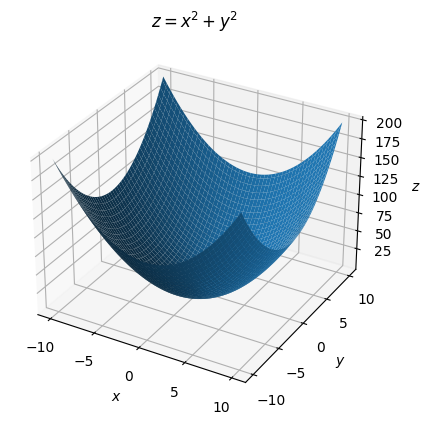

In [10]:
plot_3d(x, y, f, title='$z=x^2+y^2$')

Suppose we treat $y$ as constant, say $y=2$. If we nudge $x$ to $x+dx$, then $z$ would get nudged to
$$z+dz = f(x+dx,y) = (x+dx)^2 + y^2 = (x^2 + 2xdx + dx^2) + y^2 \approx z + 2xdx.$$
That is,
$$\frac{\partial z}{\partial x} = 2x.$$
This is exactly what we got before in the 1D case with $f(x)=x^2$. This makes since. By treating $y$ as constant we're effectively pretending it's not there in the calculation, which makes it act like we're taking the 1D derivative $z=x^2$.

Since $z=x^2+y^2$ is symmetric in $x$ and $y$, the exact same argument above would show
$$\frac{\partial z}{\partial y} = 2y.$$
The gradient vector would thus be
$$\frac{dz}{d\mathbf{x}} = (2x, 2y) = 2\mathbf{x}, \quad \text{where }\mathbf{x} = (x,y).$$
The gradient looks exactly like the 1D solution as well, except with a vector $\mathbf{x}$ instead.

Just as we did with ordinary derivatives, we can also calculate partial derivatives of our function numerically at a point of interest `(x0, y0)` by specifying small numbers `dx` and `dy`, taking differences of `f`, and dividing by the small numbers. I'll do this below for the point `(1, 1)` using `dx = dy = 1e-5`. The partial derivatives at `(1, 1)` are given by `dzdx0` and `dzdy0` respectively. The gradient vector is then just an array `grad` of these two partials. Notice the error is again on the order of `dx` and `dy`, hence we get good agreement with the equation above for $z=x^2+y^2$ at the point $(1,1)$.

In [11]:
x0 = y0 = 1
dx = dy = 1e-5

dzdx0 = (f(x0 + dx, y0) - f(x0, y0)) / dx
dzdy0 = (f(x0, y0 + dy) - f(x0, y0)) / dy

grad = [dzdx0, dzdy0]
grad

[2.00001000001393, 2.00001000001393]

Just as we could think of the ordinary derivative geometrically as the slope of the tangent line of $y=f(x)$ at the point $(x,y)$, we can do something similar for partial derivatives and gradients of a function $z=f(x,y)$. Now, however, we'd have a **tangent plane** instead of a tangent line. This tangent plane will hug the surface of the function at the point $(x,y,z)$. Here's an example, where I'll plot the tangent plane to $z=x^2+y^2$ at the point $(1,1)$. Don't worry too much about the details. Just try to soak in what's going on in the plot.

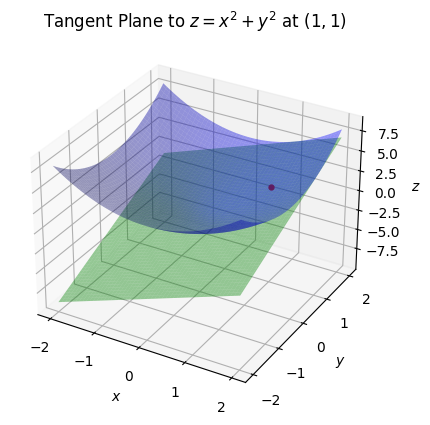

In [12]:
f = lambda x, y: x**2 + y**2
f_tangent = lambda x, y: 2 * (x + y) - 1

x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
point = [1, 1]
plot_tangent_plane(x, y, f, f_tangent, point, title='Tangent Plane to $z=x^2+y^2$ at $(1,1)$')

If you look at the plane, The partial of $z$ with respect to $x$ turns out to represent the slope of the line running along the plane *parallel* to the x-axis at the point $(1,1)$. Similarly, the partial of $z$ with respect to $y$ represents the slope of the line running along the plane parallel to the y-axis at the point $(1,1)$. The gradient vector is both of these things together, which gives a vector $(2, 2)$ that points in the steepest direction up the surface from the point $(1,1)$. Said differently, the gradient vector is the direction of *steepest ascent*.

### Differentiation in $n$ Dimensions

Similarly, we can define all of these quantities for any n-dimensional multivariate function $z=f(x_1,x_2,\cdots,x_n).$ The partial derivative of $z$ with respect to some $x_i$ is
$$\frac{\partial z}{\partial x_i} = \frac{f(x_1,x_2,\cdots,x_i+dx_i,\cdots,x_n) - f(x_1,x_2,\cdots,x_i,\cdots,x_n)}{dx_i}.$$
That is, it's the derivative of $z$ with respect to $x_i$ where all other inputs $x_j \neq x_i$ are held constant. The chain rule for the total differential $dz$ naturally extends by adding a term for each input $x_i$,
$$dz = \sum_{i=1}^n \frac{\partial z}{\partial x_i} dx_i = \frac{\partial z}{\partial x_1} dx_1 + \frac{\partial z}{\partial x_2} dx_2 + \cdots + \frac{\partial z}{\partial x_n} dx_n.$$
We can again write the chain rule as a dot product of $n$ dimensional vectors
$$
\frac{dz}{d\mathbf{x}}=\bigg(\frac{\partial z}{\partial x_1}, \frac{\partial z}{\partial x_2},\cdots,\frac{\partial z}{\partial x_n} \bigg), \\
d\mathbf{x} = (dx_1, dx_2,\cdots,dx_n), \\
dz = \frac{dz}{d\mathbf{x}} \cdot d\mathbf{x}.
$$

Here's a simple function to calculate the gradient of an $n$ dimensional function $z=f(\mathbf{x})$ at a point $\mathbf{x_0}$. We again pass in a small value for $d\mathbf{x}$, but as a vector of small values for each input variable.

I'll calculate a quick example with the $n$ dimensional generalization of our favorite function,
$$z = x_1^2 + x_2^2 + \cdots + x_n^2 = \sum_{i=1}^n x_i^2.$$
The gradient for this function should be the n-dimensional vector 
$$\frac{dz}{d\mathbf{x}} = (2x_1, 2x_2, \cdots, 2x_n) = 2\mathbf{x}.$$

Using numpy we can efficiently calculate this function with the command `np.sum(x ** 2)`. I'll choose our point of interest to be the vector `x0` of all ones. I'll define a helper function `partial` to calculate the i<sup>th</sup> partial derivative at `x0`. This will then be used in the function `gradient`, which will loop over every index, calculate each partial, and put them in a vector `grad`. Observe that yet again we have a gradient vector of all twos to within an error of around `1e-5`, except instead of 1 or 2 elements we have 100 of them.

In [32]:
def partial(f, x0, i, dxi=1e-5):
    dx = np.zeros(len(x0))
    dx[i] = dxi
    dzdxi = (f(x0 + dx) - f(x0)) / dxi
    return dzdxi

def gradient(f, x0, dxi=1e-5):
    grad = np.zeros(len(x0))
    for i in range(len(x0)):
        grad[i] = partial(f, x0, i, dxi=dxi)
    return grad

f = lambda x: np.sum(x ** 2)
x0 = np.ones(100)
grad = gradient(f, x0)
print(grad.shape)
grad

(100,)


array([2.00001, 2.00001, 2.00001, 2.00001, 2.00001, 2.00001, 2.00001,
       2.00001, 2.00001, 2.00001, 2.00001, 2.00001, 2.00001, 2.00001,
       2.00001, 2.00001, 2.00001, 2.00001, 2.00001, 2.00001, 2.00001,
       2.00001, 2.00001, 2.00001, 2.00001, 2.00001, 2.00001, 2.00001,
       2.00001, 2.00001, 2.00001, 2.00001, 2.00001, 2.00001, 2.00001,
       2.00001, 2.00001, 2.00001, 2.00001, 2.00001, 2.00001, 2.00001,
       2.00001, 2.00001, 2.00001, 2.00001, 2.00001, 2.00001, 2.00001,
       2.00001, 2.00001, 2.00001, 2.00001, 2.00001, 2.00001, 2.00001,
       2.00001, 2.00001, 2.00001, 2.00001, 2.00001, 2.00001, 2.00001,
       2.00001, 2.00001, 2.00001, 2.00001, 2.00001, 2.00001, 2.00001,
       2.00001, 2.00001, 2.00001, 2.00001, 2.00001, 2.00001, 2.00001,
       2.00001, 2.00001, 2.00001, 2.00001, 2.00001, 2.00001, 2.00001,
       2.00001, 2.00001, 2.00001, 2.00001, 2.00001, 2.00001, 2.00001,
       2.00001, 2.00001, 2.00001, 2.00001, 2.00001, 2.00001, 2.00001,
       2.00001, 2.00

## Optimization

For the purposes of machine learning, by far the most important application of differentiation is to optimization. **Optimization** is the problem of finding the "best" values with respect to some function. Usually in machine learning, by "best" we mean finding the minimum value of a *loss function*, which is a function that measures agreement between a model's prediction and the data it sees. Finding the minimum value of the loss function essentially means we've found the best weights for our model, the ones that give the highest accuracy on the data.

An interesting fact is that for a reasonably smooth function, its minimum value will *always* be at a point where the derivative is zero. To see why, consider our tangent line plot of $y=x^2$ from before. What happens if we set our point of interest to be $x_0=0$? Clearly that's the minimum of this function. At this point, the tangent line hugs the parabola horizontally, which means it's a point where the slope is zero.

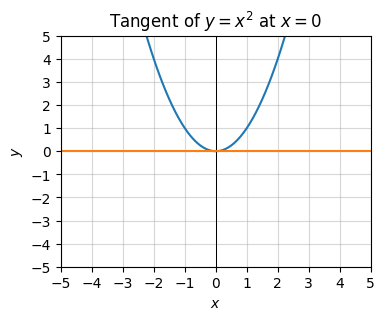

In [14]:
f = lambda x: x ** 2
x = np.arange(-10, 10, 0.1)
y = f(x)
y_tangent = get_tangent_line(x, y, x0=0)
plot_function(x, (y, y_tangent), (-5, 5), (-5, 5), title=f'Tangent of $y=x^2$ at $x={0}$')

This same fact also holds for the maximum of a function as well. Not just the maximum, but any other point where the function is flat, called **saddle points**. As an example, the origin is a saddle-point of the function $y=x^3$. These general points where the derivative is zero (min, max, or saddle point) are called **stationary points**.

In machine learning we usually only care about the minimum, so we won't focus on these other cases. I'll just mention that we can formulate any maximum problem as a minimum problem by just multiplying the function by -1, which flips the function upside down, turning the max into a min.

More formally, suppose we have a univariate function $y=f(x)$. The problem of (unconstrained) optimization is to find the point $x^*$ such that $y^* = f(x^*)$ for all $x$ is the **minimum** value of $f(x)$, i.e. 
$$y^* = \min f(x) \leq f(x) \text{ for all } x.$$
The special point $x^*$ that minimizes the function is called the **argmin**, written $$x^* = \text{argmin } f(x).$$

I've neglected to mention a subtle point, which is what exactly I mean by "the minimum". When I say $y^* \leq f(x)$ for all $x$, which $x$ values am I talking about? This means we're really only talking about the minimum over some *range* of $x$ values. We have to specify what that range is. If the range is the whole real line, it really is *the* minimum, usually called the **global minimum**. If it's over some subset of the real line it may not be the global minimum since we're not looking at every $x$. It's only the minimum in our region of interest. This sort of region-specific minimum is called a **local minimum**. 

While this seems like a subtle point, it is an important one in machine learning. Some algorithms, like deep learning algorithms, can only reliably find a local minimum. Finding the global minimum can be harder unless there's only one minimum to begin with. These simple functions are called **convex functions**. Our above example of $y=x^2$ is a convex function. It only has one minimum, and the function just slopes up around it on both sides in a bowl shape. Deep learning loss functions on the other hand are nasty, wiggly things with lots of bumps and valleys. Such functions are called **non-convex functions**. In general they'll have lots of local minima.

So back to the fact about the derivative being zero at the minimum, what we "proved" by example is that at the point $x^*$ we should have
$$\frac{dy}{dx}\bigg|_{x=x^*}=0.$$
Another useful way to state the same fact is to think in terms of infinitesimals: At $x^*$, any infinitesimal perturbation $dx$ won't change the value of the function at all, $f(x^*+dx) = f(x^*)$. This is just another way of stating that $dy=0$ at $x^*$. The fact that small perturbations don't change the function's value is unique to minima and other stationary points.

Let's verify this fact with the same example $y=x^2$ by looking at small perturbations around $x=0$. Since $f(0)=0$ is a minimum, any perturbation should just give $0$ as well. Choosing a $dx$ of `1e-5`, we can see that the function's perturbed value $f(0+dx)$ is only about `1e-10`, essentially negligible since $dx^2 \approx 0$ for infinitesimals. This won't be true for any other value of $x$, e.g. $x=1$, which has a much larger change of `2e-5`, which is on the order of $dx$, as expected.

In [15]:
dx = 1e-5
f(0 + dx) - f(0)

1.0000000000000002e-10

In [16]:
f(1 + dx) - f(1)

2.0000100000139298e-05

### Gradient Descent

So if the minimum is so important how do we actually find the thing? For simple functions like $y=x^2$ we can do it just by plotting the function, or by trial and error. We can also do it analytically by solving the equation $\frac{dy}{dx}\big|_{x^*}=0$ for $x^*$. But for complicated functions, or functions we can't exactly write down, this isn't feasible. We need an algorithmic way to do it.

Let's try something simple. Since the derivative at $x$ tells us the slope of the function at $x$, it's in some sense telling us how far we are away from the minimum. Suppose we perturb $x$ to $dx$. Then $y=f(x)$ gets perturbed to $y+dy=f(x+dx)$. Now, observe the almost trivial fact that
$$dy = \frac{dy}{dx}dx.$$
So if $\frac{dy}{dx}$ is *large*, small changes in $x$ will result in large changes in $y$. Similarly, if $\frac{dy}{dx}$ is *small*, then small changes in $x$ will result in small changes in $y$. But we demonstrated above that if we're near the minimum we *know* that changes in $y$ will be tiny if $dx$ is small. Thus, the derivative serves as a kind of "how close are we to the minimum" metric.

But that's not all the derivative tells us. Since the sign of the derivative indicates which way the slope is slanting, it also tells us which direction the minimum is in. If you're at a point on the function, the minimum will always be in the direction that's sloping downward from you. Since the slope slants upward in the direction of the sign of the derivative, and we want to move downward the other way, **the minimum will be in the direction of the negative of the derivative**.

More formally, suppose we want to find the minimum of $y=f(x)$. To start, we'll pick a point $x_0$ at random. Doesn't matter too much how. Pick a step size, we'll call it $\alpha$. This will multiply the derivative and tell us how big of a step to take towards the minimum (more on why this is important in a second). Now, we'll take a step towards the minimum
$$x_1 = x_0 - \alpha \frac{dy}{dx}\bigg|_{x_0}.$$
This puts us at a new point $x_1$, which will be closer to the argmin $x^*$ if our step size is small enough. Now do it again,
$$x_2 = x_1 - \alpha \frac{dy}{dx}\bigg|_{x_1}.$$
And again,
$$x_3 = x_2 - \alpha \frac{dy}{dx}\bigg|_{x_2}.$$
Keep doing this over and over. Stop when the points aren't changing much anymore, i.e. when $|x_{n+1}-x_n|<\varepsilon$ for some small tolerance $\varepsilon$. Then we can say that the argmin is $x^* \approx x_n$, and the minimum is $y^* \approx f(x_n)$. Done.

This simple algorithm to find the (local) minimum by starting at a random point and steadily marching in the direction of the derivative is called **gradient descent**. With some relatively minor modifications here and there, gradient descent is how many machine learning algorithms are trained, including essentially all deep learning algorithms. It's very possibly the most important algorithm in machine learning.

In machine learning, running an optimizer like gradient descent is usually called **training**. You can kind of imagine optimization as trying to teach something to a model. The condition of being at the minimum is analogous to the model learning whatever task it is you're trying to teach it. The thing we're minimizing in this case is the loss function, which is hand-picked essentially to measure how well the model is learning the given task.

The step size $\alpha$ is so important in machine learning that it's given a special name, the **learning rate**. It in essence controls how quickly a model learns, or trains. I'll use this terminology for $\alpha$ going forward.

Here's what the algorithm looks like as a python function `gradient_descent`. It will take as arguments the function `f` we're trying to minimize, the function for its derivative or gradient `grad_fn`, the initial point `x0`, the learning rate `alpha`. I'll also pass in two optional arguments, `max_iter` and `eps`, where `max_iter` is how many iterations to run gradient descent in the worst case, and `eps` is the tolerance parameter to indicate when to stop.

In [17]:
def gradient_descent(f, grad_fn, x0, alpha, max_iter=1000, eps=1e-5):
    x_prev = x0  # initialize the algorithm
    for i in range(max_iter):
        x_curr = x_prev - alpha * grad_fn(x_prev)  # gradient descent step
        if np.abs(x_curr - x_prev) < eps:  # if changes are smaller than eps we're done, return x*
            print(f'converged after {i} iterations')
            return x_curr
        x_prev = x_curr
    print(f'failed to converge in {max_iter} iterations')  # else warn and return x* anyway
    return x_curr

Let's run this algorithm on our simple example $y=x^2$. Recall its derivative function is $\frac{dy}{dx}=2x$. I'll choose an initial point $x_0=5$ and a learning rate of $\alpha=0.8$. The optional arguments won't change.

We can see that gradient descent in this case converges (i.e. finishes) after only 27 iterations. It predicts an argmin of about $x^* \approx 3 \cdot 10^{-6}$ and a minimum of about $y^* \approx 9 \cdot 10^{12}$. Since both are basically $0$ (the true value for both) to within one part in $10^{-5}$ we seem to have done pretty well here. 

Feel free to play around with different choices of the learning rate `alpha` to see how that affects training time and convergence. Getting a good feel for gradient descent is essential for a machine learning practitioner.

In [18]:
f = lambda x: x ** 2
grad_fn = lambda x: 2 * x
x0 = 5
alpha = 0.8
x_min = gradient_descent(f, grad_fn, x0, alpha)
y_min = f(x_min)
print(f'estimated argmin: {x_min}')
print(f'estimated min: {y_min}')

converged after 27 iterations
estimated argmin: 3.070471107232419e-06
estimated min: 9.427792820349077e-12


While I've shown the math and code for gradient descent, we've still yet to get a good intuition for what the algorithm is doing. For this I'll turn to a visualization. What I'm going to do is plot the function curve in black, and on top of it show each step of gradient descent. Each red dot on the curve of the function will indicate the point $(x_n,y_n)$ at step $n$ of the algorithm. Successive steps will be connected by a red line. Each red line will show which points the algorithm jumps from and to at each step. Starting and ending points will be annotated as well.

To do this I'll use a helper function `plot_gradient_descent`, which takes in the same arguments as `gradient_descent` as well as a few more arguments that do some styling of the plot. Internally, all this function is doing is running gradient descent on the given arguments, then plotting the functions, dots, and line segments described.

I'll start by showing what gradient descent is doing on the exact same example as above. The curve of course is just a parabola sloping upward from the origin. The starting point is just $(x_0,f(x_0))=(5,25)$. After running for $N=30$ iterations the algorithm basically settles down to $(x_N,f(x_N)) \approx (0,0)$. Notice what's happening in between though. Imagine you dropped a marble into a bowl at the starting point. After landing, the marble bounces across the bowl several times as it settles down around the origin, where it rolls around less and less until it eventually dissipates all its kinetic energy and settles down at the bottom of the bowl.

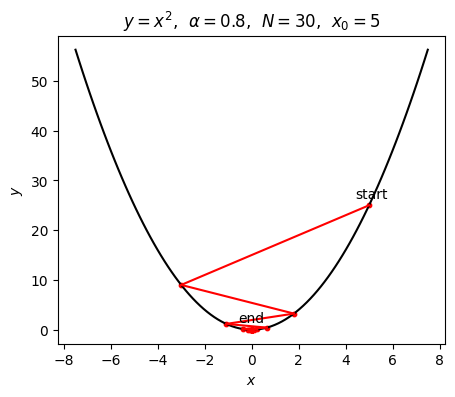

In [19]:
plot_gradient_descent(f=f, grad_fn=grad_fn, x0=x0, alpha=alpha, n_iters=30, 
                      title=f'$y=x^2$,  $\\alpha={alpha}$,  $N={30}$,  $x_0={x0}$')

To illustrate what the learning rate is doing, and how important it is to tune it well, let's try the same problem in two other cases: a really high learning rate, and a really low learning rate. I'll start with a high learning rate of $\alpha=1.1$. I'll run the algorithm this time for $N=20$ iterations. 

Pay particular attention in this case to the start and end labels. Evidently choosing a high learning rate caused the algorithm not to spiral down towards the minimum, but to spiral up away from the minimum! This is the hallmark of choosing too large a learning rate. The algorithm won't converge at all. It'll just keep shooting further and further away from the minimum.

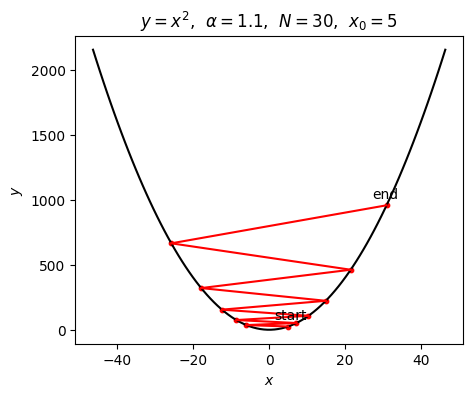

In [20]:
alpha = 1.1
N = 20
plot_gradient_descent(f=f, grad_fn=grad_fn, x0=x0, alpha=alpha, n_iters=10, 
                      title=f'$y=x^2$,  $\\alpha={alpha}$,  $N={30}$,  $x_0={x0}$')

Let's now look at a low learning rate of $\alpha=0.01$. I'll run this one for $N=150$ iterations. Notice now that the algorithm is indeed converging towards the minimum, but it's doing it really, really slowly. It's not bouncing around the bowl at all, but rather slowly crawling down in small steps. This is the hallmark of using too low a learning rate. The algorithm will converge, but it'll do so really, really slowly, and you'll need to train for a lot of iterations.

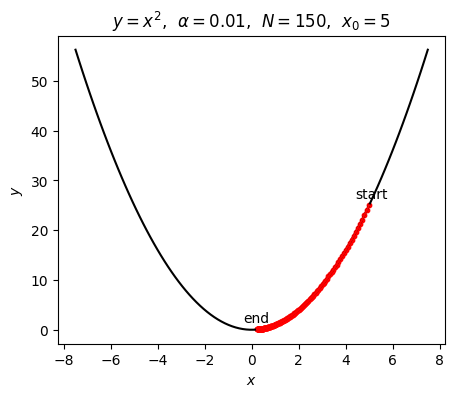

In [21]:
alpha = 0.01
N = 150
plot_gradient_descent(f=f, grad_fn=grad_fn, x0=x0, alpha=alpha, n_iters=N,
                      title=f'$y=x^2$,  $\\alpha={alpha}$,  $N={N}$,  $x_0={x0}$')

Things may seem all fine and good. We have an algorithm that seems like it can reliably find the minimum of whatever function we give it, at least in the univariate case. Unfortunately, there are a few subtleties involved that I've yet to mention. It turns out that the function I picked, $y=x^2$ is a particularly easy function to minimize. It's a convex function. Not all functions behave that nicely. Practically no loss function in deep learning does.

If a function is non-convex (i.e. not bowl-shaped) it can have multiple minima. This means that you can't be sure gradient descent will pick out the global minimum if you run it. Which minimum it settles in will depend on your choice of initial point $x_0$, the learning rate $\alpha$, and perhaps even the number of iterations $N$ you run the algorithm.

This isn't the only problem, or even the worst problem. Perhaps the worst problem is saddle points. If there are saddle points in the function, gradient descent may well settle down on one of those instead of any of the minima. Here's an example of this. Let's look at the function $y=x^3 + (x+1)^4$. Its derivative function turns out to be $\frac{dy}{dx}=3x^2 + 4(x+1)^3$. Check WolframAlpha if you don't believe me.

Now, suppose we want to find the minimum of this function. Not knowing any better, we pick an initial point $x_0=3$, and just to be safe we pick a small learning rate $\alpha=0.001$. Let's run gradient descent now for $N=500$ iterations. Surely that's enough to find the minimum, right?

Evidently not. The true minimum seems to be somewhere around the point $(-2.8, -12)$. The algorithm didn't settle down anywhere near this point. It settled around the origin $(0,0)$. So what happened? If you look closely, you'll see it got stuck in a flat spot, i.e. a saddle point. No matter how many iterations you run gradient descent with this learning rate, it will never leave this flat spot. It's stuck.

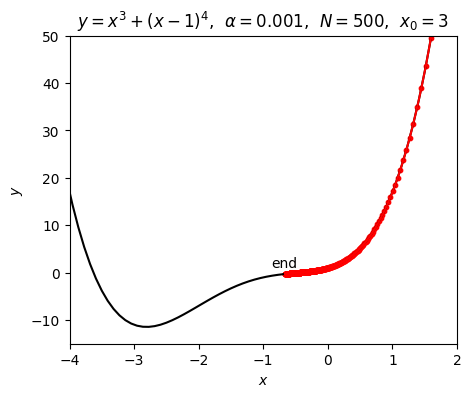

In [22]:
f = lambda x: x ** 3 + (x + 1) ** 4
grad_fn = lambda x: 3 * x ** 2 + 4 * (x + 1) ** 3
x0 = 3
N = 500
alpha=0.001
plot_gradient_descent(f, grad_fn, x0, alpha=alpha, n_iters=N, xlim=(-4, 2), ylim=(-15, 50), 
                      title=f'$y=x^3 + (x-1)^4$,  $\\alpha={alpha}$,  $N={N}$,  $x_0={x0}$')

All isn't necessarily lost. What happens if we pick a higher learning rate to let the algorithm bounce around the function a little bit before slowing down? Let's pick $\alpha=0.03$ now and run for the same number of iterations. Now it looks like we're doing just fine. Gradient descent was able to bounce across the flat spot and settle down at the other side.

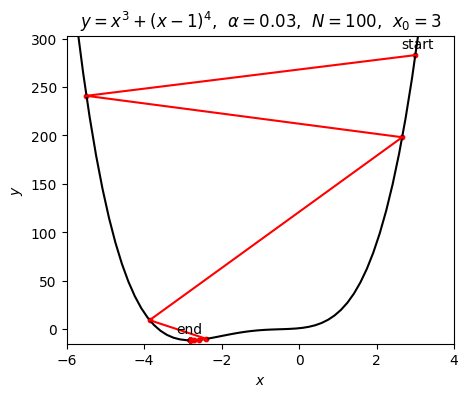

In [23]:
alpha=0.03
N = 100
plot_gradient_descent(f, grad_fn, x0, alpha=alpha, n_iters=N, xlim=(-6, 4), ylim=(-15, f(3) + 20), 
                      annotate_start_end=True,
                      title=f'$y=x^3 + (x-1)^4$,  $\\alpha={alpha}$,  $N={N}$,  $x_0={x0}$')

This example was meant to show that saddle points can be a real issue. Gradient descent will not tell you if the point it found is a minimum or a saddle point, it'll just stop running and spit out a value. You thus need to be careful about things like this when running gradient descent on real-life functions. It's even worse in higher dimensions, where it turns out that almost all stationary points will be saddle points, and very few will be minima or maxima.

For these reasons, it's common in machine learning to not use a tolerance condition like $|x_{n}-x_{n-1}| < \varepsilon$. Instead we just specify some number of iterations $N$ and run the algorithm $N$ times. Basically, we want to give the algorithm a chance to get out of a flat spot if it gets stuck in one for some reason. Said differently, if a function is not convex, and most in machine learning are not convex, the notion of convergence doesn't necessarily mean that much since we don't even know if we're at a minimum or not.

### Higher Dimensional Optimization

Pretty much everything I've said on optimization extends naturally to higher dimensions. That's why I went into so much detail on the simple univariate case. It's easier to explain and visualize. To extend to $n$ dimensions we basically just need to convert inputs into vectors and derivatives into gradients. Other than this the formulas all look basically the same.

Suppose we have now a scalar-valued multivariate function $z=f(\mathbf{x})=f(x_1,\cdots,x_n)$. The problem of (unconstrained) optimization is to find the vector $\mathbf{x}^*$ such that $z^* = f(\mathbf{x}^*)$ is the **minimum** value of $f(\mathbf{x})$, i.e. 
$$z^* = \min f(\mathbf{x}) \leq f(\mathbf{x}) \text{ for all } \mathbf{x} \in \mathbb{R}^n.$$
The vector $\mathbf{x}^*$ that minimizes the function is called the **argmin**, written $$\mathbf{x}^* = \text{argmin } f(\mathbf{x}).$$

Just as the derivative is zero at the minimum in the univariate case, the *gradient* is the *zero vector* at the minimum in the multivariate case,
$$\frac{dz}{d\mathbf{x}}\bigg|_{\mathbf{x}=\mathbf{x^*}}=\mathbf{0}.$$
Another way of stating the same fact is that at the minimum $f(\mathbf{x^*} + d\mathbf{x}) = f(\mathbf{x^*})$ for any vector of infinitesimal perturbation $d\mathbf{x}$. Equivalently, $dz=0$.

The gradient descent algorithm works exactly the same as in the univariate case, except we now use the gradient vector instead of the derivative at each step. Here's the algorithm in steps:
1. Initialize a starting vector $\mathbf{x}_0$.
2. For $N$ iterations, perform the gradient descent update
$$\mathbf{x}_n = \mathbf{x}_{n-1} - \alpha \frac{dz}{d\mathbf{x}}\bigg|_{\mathbf{x}=\mathbf{x}_{n-1}}.$$
3. Converge either when some convergence criterion is satisfied, $||\mathbf{x}_n-\mathbf{x}_{n-1}||_2 \leq \varepsilon$, or when some maximum number of iterations $N$ is reached.
4. Return $\mathbf{x}_N$. The best guess for the argmin is $\mathbf{x}^* \approx \mathbf{x}_N$, and for the minimum is $z^* \approx f(\mathbf{x}_N)$. 

**Aside:** I'll quickly note that gradient descent isn't the only minimization algorithm. Some other algorithms worth noting use not just the first derivative in their updates, but also the second derivative. Examples include algorithms like Newton's Method and LBFGS. The second derivative provides information about the curvature of the function, which can speed up convergence by making the learning rate adaptive. While these *second-order* algorithms are useful in some areas of machine learning, it usually turns out to be far too computationally expensive to calculate the second derivative (also called the Hessian) of a function in high dimensions. Perhaps the main reason gradient descent is used in machine learning is because it provides a good tradeoff between its speed of convergence and computational performance.

This pretty much covers everything I wanted to talk about regarding optimization, the most important application of calculus to machine learning. In future lessons we'll spend more time talking about gradient descent as well as its more modern variants like SGD and Adam.

## Integration [Optional]

This section is only important for machine learning in my opinion if you want to better understand what probability distributions are. We'll cover probability distributions in more detail in the next lesson, both discrete and continuous distributions. If you want to understand the continuous distributions better it will probably help you to at least skim this section on integration.

### One-Dimensional Integrals

The other half of calculus is essentially about summing up small things to get big things. By small things of course we again mean infinitesimals. Suppose we have a bunch of infinitesimals $\varepsilon_1, \varepsilon_2, \cdots, \varepsilon_n$. Like any other number we can add them together to get a new infinitesimal
$$\varepsilon = \varepsilon_1 + \varepsilon_2 + \cdots + \varepsilon_n.$$

Take $\varepsilon=10^{-200}$ for example. We showed that as far as a computer is concerned $\varepsilon^2=0$. But what happens if we instead start adding up a bunch of $\varepsilon$? Suppose we add up $\varepsilon$ $N$ times. If $N$ is any reasonably sized finite number, a number like $N=1000$, $\varepsilon$ will still be infinitesimal. But what about if we make $N$ *huge*, infinite for practical purposes, say $N=10^{200}$? Then we just get $N\varepsilon=1$, a finite number.

In [24]:
epsilon = 1e-200
N = 1000
N * epsilon, (N * epsilon) ** 2

(1e-197, 0.0)

In [25]:
epsilon = 1e-200
N = 1e200
N * epsilon, (N * epsilon) ** 2

(1.0, 1.0)

If we add up only a *finite* number of infinitesimals we'll again get an infinitesimal, so in the case above $\varepsilon$ is again an infinitesimal assuming $n$ is finite. But if we add up *infinitely* many infinitesimals we'll get something finite. This is the idea behind integration.

Let's do an example. Suppose for whatever reason we're interested in the area bounded by the curve $y=\sqrt{x}$ and the $x$ axis, say from $x=0$ to $x=10$. How would we calculate this? One idea might be to approximate the function with rectangles of width $dx=1$ and height $f(x)$, where $x$ is taken at each integer value $x=1,2,3,\cdots,10$. Then approximately speaking the area $A$ would just be the sum of all these rectangles:

$$
\begin{align}
A &\approx f(1)dx + f(2)dx + f(3)dx + \cdots + f(10)dx \\
&= \big(f(1) + f(2) + f(3) + \cdots + f(10)\big)\cdot 1 \\
&= \sqrt{1} + \sqrt{2} + \sqrt{3} + \cdots + \sqrt{10} \\
&\approx 22.468
\end{align}
$$

Let's verify this by creating a grid of 100 $x$ values from 0 to 10. I'll use the same width $dx=1$, a lambda function for the square root, and pass these into a helper function `plot_area_under_curve`, which will show the approximate area along with a plot of the curve and its approximating rectangles.

Approximate Area: 22.468278186204103


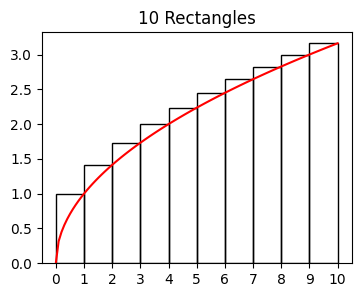

In [26]:
f = lambda x: np.sqrt(x)
x = np.linspace(0, 10, 100)
plot_area_under_curve(x, f, dx=1.0)

But there's an error in this area estimate. You can tell by looking at the rectangles in the plot. They are actually *overestimating* the area under the curve. The exact answer turns out to be 
$$A = \frac{20}{3}\sqrt{10} \approx 21.082.$$

How can we improve this estimate? Use more rectangles! Our problem was that the rectangles we used were too coarse. What we need to do is make $dx$ smaller while at the same time making the number of rectangles used bigger in proportion. Let's try using 50 rectangles of width $dx=0.2$ instead and see how much the result improves.

Approximate Area: 21.380011968222313


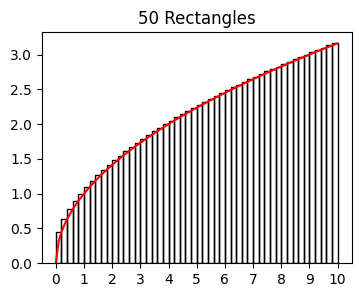

In [27]:
plot_area_under_curve(x, f, dx=0.2)

It looks better. We're at $21.380$ now. Still overestimating the true area, but not by as much. As we make $dx$ smaller and smaller, and $N$ bigger and bigger, this estimate will get better and better.

More generally, suppose $N$ is the number or rectangles. We'll take the heights of the function at each equal length point $x_1,x_2,\cdots,x_N$, each of width $dx$. Then
$$A \approx f(x_1)dx + f(x_2)dx + f(x_3)dx + \cdots + f(x_N)dx.$$
It's annoying to write out these sums like this. We can write it in compact summation notation as
$$A \approx \sum_{n=1}^{N} f(x_n) dx.$$

If we keep making these rectangles smaller and smaller until $dx$ is infinitesimal and the number or rectangles is infinitely large, we'll get the *exact* area. Even though it's *still* a sum, in this situation we historically use a different symbol, $\int$, a long S that looks like the S in "sum". It basically means the same as the sum $\Sigma$, except it's understood that we're summing over infinitely many infinitesimal terms $f(x)dx$,
$$A = \int_0^{10} f(x) dx.$$
The right-hand side is called the (definite) **integral** of $y=f(x)$, read as $\text{"the integral of } f(x) \text{ from } x=0 \text{ to } x=10\text{"}$. The process of actually calculating an integral is called **integration**.

Let's try to calculate these areas using smaller and smaller rectangles and see how close we can get to the exact answer. To do this, I'll define a lambda function for $f(x)=\sqrt{x}$, and use a loop to calculate the area for successively smaller values of $dx$. Note $N$ follows from the choice of $dx$ since we must have $N=\frac{b-a}{dx}$, which in this case is just $N=\frac{10-0}{dx}$.

In [28]:
f = lambda x: np.sqrt(x)

for dx in [1, 0.1, 0.01, 0.001, 0.0001]:
    N = int(10 / dx)
    xs = np.cumsum(dx * np.ones(N))
    area = np.sum([f(x)*dx for x in xs])
    print(f'N = {N:6d} \t dx = {dx:8.4f} \t A = {area:4f}')

N =     10 	 dx =   1.0000 	 A = 22.468278
N =    100 	 dx =   0.1000 	 A = 21.233523
N =   1000 	 dx =   0.0100 	 A = 21.097456
N =  10000 	 dx =   0.0010 	 A = 21.083426
N = 100000 	 dx =   0.0001 	 A = 21.082009


It looks like if we want to get the correct answer $21.082$ to 3 decimal places we'd need to use $N=100,000$ rectangles of width $dx=10^{-4}$. In practice, that's pretty horrible. There are better ways to actually calculate these integrals numerically on a computer than just using the above definition (look up [Simpson's Rule](https://en.wikipedia.org/wiki/Simpson%27s_rule) for example), but these aren't really important to know for machine learning.

For an arbitrary function $y=f(x)$, the integral from a left-hand point $x=a$ to a right-hand point $x=b$ is given similarly by
$$\int_a^b f(x) dx = \sum_{n=1}^{N} f(x_n) dx,$$
where $dx$ is taken to be infinitesimal and $N$ to be infinitely large in proportion, so that $x_n-x_{n-1}=dx$ for each $n=1,\cdots,N$. That is, the integral is defined as the sum of infinitely small non-overlapping rectangles under the curve $f(x)$, each of width $dx$ and height $f(x_n)$.

It's not at all clear from this definition how we'd get the *exact* answer $\frac{20}{3}\sqrt{10}$ shown above. We can get to it approximately by summing rectangles, but to actually be able to *calculate* the exact value we'd need a few integral rules. I won't do this though since you don't really need to know how to do that in machine learning. I have to draw the line somewhere or this lesson will turn into a book in its own right.

If you want some form of proof though that the answer I gave is exact, you can ask WolframAlpha with the following query. Provided an integral can be evaluated symbolically (they can't always), WolframAlpha will usually do it.

In [29]:
query_wolfram_alpha('integral sqrt(x) dx from 0 to 10')

'integral_0^10 sqrt(x)dx = (20 sqrt(10))/3≈21.082'

### Higher-Dimensional Integrals

I'll end this optional section by *briefly* mentioning that we can also take integrals of multivariate functions like $z=f(x,y)$. The problem we run into is what kind of thing is it we want to integrate? Do we want the *volume* under the surface? The area of the surface itself? Etc. Probably the only one worth knowing about in machine learning is the first definition, calculating the volume under a surface.

The idea of calculating a volume integral is to approximate the volume $V$ under a surface not with rectangles, but with $N\cdot M$ rectangular prisms with base area $dA = dx \cdot dy$ and height $z=f(x,y)$,
$$V = \int_R f(x,y) dA = \sum_{n=1}^N \sum_{m=1}^M f(x_n,y_m) dxdy.$$
Rather than integrate from one endpoint $a$ to another endpoint $b$, we now have to integrate over a 2D region in the xy-plane that I'll call $R$. That region could be a rectangle, in which case we'd have
$$V = \int_a^b \int_c^d f(x,y) dxdy.$$
Usually $R$ won't be a rectangle, but some arbitrary shape. It could even be infinite in one or more directions.

Though impossible to visualize, we can readily extend this same idea to $n$ dimensional functions $z=f(x_1,\cdots,x_n)$. In this case we're calculating the $n$ dimensional *hypervolume* $V_n$ under the $n-1$ dimensional *manifold* $z=f(x_1,\cdots,x_n)$. The hyperrectangles would now have base hyperarea $dA_{n-1} = dx_1dx_2\cdots dx_n$ and height $z=f(x_1,\cdots,x_n)$, so
$$V_n = \int_{R_{n-1}} f(x_1,\cdots,x_n) dA_{n-1} = \sum_{\text{all hyperrectangles}} f(x_1,\cdots,x_n) dx_1dx_2\cdots dx_n.$$

The only important place that integrals like this come up in machine learning is in the definition of continuous probability distributions like the Gaussian or Uniform distributions. We'll cover these distributions in the next lesson. When you see those integrals don't worry much about them. Just think of them as calculating volumes under surfaces using infinitely thin rectangular prisms.